In [1]:
from acevedo_clss_and_fcns import * 
device = 'cpu'
if torch.cuda.is_available():
    torch.cuda.init()
    if torch.cuda.is_initialized():
        device = 'cuda:0'
print(f"{device = }")
def train_one_epoch(modelo: GIN_classifier_to_explain_v2,
                    optimizer, 
                    train_loader: torch_geometric.loader.dataloader.DataLoader,
                    loss_fun: torch.nn.modules.loss,
                    device:str='cpu' ):

    correct = 0
    for i, data in enumerate(train_loader):
        assert not data.is_cuda   
        if (device == 'cuda:0') | (device == 'cuda'):                            
            data.to(device, non_blocking=True) 
            assert data.is_cuda       
                
        optimizer.zero_grad(set_to_none=True) # Zero your gradients for every batch        
        if (device == 'cuda:0') | (device == 'cuda'):
            #with torch.cuda.amp.autocast():      
            predictions = modelo(data.x, data.edge_index,  data.batch)# Make predictions for this batch
            loss        = loss_fun(predictions, data.y)
            loss.backward()  # Derive gradients.
            optimizer.step()  # Update parameters based on gradients.        
            pred     = predictions.argmax(dim=1)  # Use the class with highest probability.
            correct += int((pred == data.y).sum())  # Check against ground-truth labels.

    return correct / len(train_loader.dataset)

def validate(modelo: GIN_classifier_to_explain_v2, loader: DataLoader, device: str = 'cpu'):
    modelo.eval()
    correct = 0
    for i, val_data in enumerate(loader):
        
        assert not val_data.is_cuda
        if (device == 'cuda:0') | (device == 'cuda'):
            val_data.to(device, non_blocking=True) 
            assert val_data.is_cuda                          

        val_predictions = modelo(val_data.x, val_data.edge_index,  val_data.batch)# Make predictions for this batch
        pred            = val_predictions.argmax(dim=1)

        correct += int((pred == val_data.y).sum())
        

    return correct / len(loader.dataset)   

/DeepenData/.miniconda/envs/geo/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


device = 'cuda:0'


### Unmasked

In [2]:
loader_path     = "./results/dataloaders/loader_Concen_plus_Fluxes.pt"
saving_folder     = "./results/trained_models"
saving_subfolder = "/Non_masked_Phe"
loader = torch.load(loader_path)
a_batch         = next(iter(loader.get_train_loader()))
a_graph         = a_batch[0]
Unmasked_model           = GIN_classifier_to_explain_v2(
                                            n_nodes = a_graph.num_nodes, 
                                            num_features = a_graph.num_node_features, 
                                            n_classes = a_graph.num_classes,
                                            hidden_dim=8,
                                            num_layers=2).to(device, non_blocking=True).to(device)


optimizer       = torch.optim.Adam(Unmasked_model.parameters())
loss_function   = torch.nn.NLLLoss()
best_validation_accuracy = 1e-10
EPOCHS = 10
verbose = True
gc.collect()
torch.cuda.empty_cache() 
all_train_accuracy_Unmasked = []
all_validation_accuracy_Unmasked = []
save = True
for epoch in tqdm.tqdm(range(EPOCHS)):
    
    train_accuracy = train_one_epoch(Unmasked_model,
                        optimizer=optimizer, 
                        train_loader=loader.get_train_loader(),
                        loss_fun=loss_function,
                        device = device)

    validation_accuracy = validate(Unmasked_model, loader.get_validation_loader(), device)
    
    all_train_accuracy_Unmasked.extend([train_accuracy])
    all_validation_accuracy_Unmasked.extend([validation_accuracy])
    
    
    if validation_accuracy > best_validation_accuracy:
        best_validation_accuracy = validation_accuracy
        del validation_accuracy
        best_val_state_dict   = copy.deepcopy(Unmasked_model.state_dict())
        best_val_model        = copy.deepcopy(Unmasked_model)
        
        if verbose:
            timestamp     = datetime.now().strftime('%d-%m-%Y_%Hh_%Mmin')              
            print(f'Epoch: {epoch:03d}, train_accuracy: {train_accuracy:.4f}, best_validation_accuracy: {best_validation_accuracy:.4f}')
            
            if save:            
                model_path = saving_folder+saving_subfolder+'/Model_{}_{}_best_ValAcc_{}_epoch_{}.pt'.format(Unmasked_model.__class__.__name__,timestamp, best_validation_accuracy, epoch)
                torch.save(best_val_model, model_path)
                print(f"saved as {model_path}")

 10%|█         | 1/10 [00:06<00:55,  6.21s/it]

Epoch: 000, train_accuracy: 0.6220, best_validation_accuracy: 0.9328
saved as ./results/trained_models/Non_masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_33min_best_ValAcc_0.9327964454318245_epoch_0.pt


 20%|██        | 2/10 [00:12<00:47,  5.98s/it]

Epoch: 001, train_accuracy: 0.9311, best_validation_accuracy: 0.9528
saved as ./results/trained_models/Non_masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_33min_best_ValAcc_0.9527908914190503_epoch_1.pt


 30%|███       | 3/10 [00:17<00:41,  5.89s/it]

Epoch: 002, train_accuracy: 0.9667, best_validation_accuracy: 0.9670
saved as ./results/trained_models/Non_masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_33min_best_ValAcc_0.9669536239933352_epoch_2.pt


 40%|████      | 4/10 [00:23<00:35,  5.86s/it]

Epoch: 003, train_accuracy: 0.9758, best_validation_accuracy: 0.9764
saved as ./results/trained_models/Non_masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_33min_best_ValAcc_0.9763954457095251_epoch_3.pt


 50%|█████     | 5/10 [00:29<00:29,  5.85s/it]

Epoch: 004, train_accuracy: 0.9830, best_validation_accuracy: 0.9833
saved as ./results/trained_models/Non_masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_34min_best_ValAcc_0.9833379616773119_epoch_4.pt


 60%|██████    | 6/10 [00:35<00:23,  5.87s/it]

Epoch: 005, train_accuracy: 0.9878, best_validation_accuracy: 0.9878
saved as ./results/trained_models/Non_masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_34min_best_ValAcc_0.9877811718966953_epoch_5.pt


 70%|███████   | 7/10 [00:41<00:17,  5.81s/it]

Epoch: 006, train_accuracy: 0.9903, best_validation_accuracy: 0.9894
saved as ./results/trained_models/Non_masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_34min_best_ValAcc_0.9894473757289641_epoch_6.pt


 80%|████████  | 8/10 [00:46<00:11,  5.77s/it]

Epoch: 007, train_accuracy: 0.9914, best_validation_accuracy: 0.9917
saved as ./results/trained_models/Non_masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_34min_best_ValAcc_0.991668980838656_epoch_7.pt


 90%|█████████ | 9/10 [00:52<00:05,  5.75s/it]

Epoch: 008, train_accuracy: 0.9920, best_validation_accuracy: 0.9922
saved as ./results/trained_models/Non_masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_34min_best_ValAcc_0.9922243821160789_epoch_8.pt


100%|██████████| 10/10 [00:58<00:00,  5.81s/it]


### MASKED

In [3]:
from acevedo_clss_and_fcns import * 
device = 'cpu'
if torch.cuda.is_available():
    torch.cuda.init()
    if torch.cuda.is_initialized():
        device = 'cuda:0'
print(f"{device = }")

saving_folder     = "./results/trained_models"
saving_subfolder = "/Masked_Phe"
loader_path     =  "./results/dataloaders/MASKED_loader_Concen_plus_Fluxes.pt"

loader = torch.load(loader_path)
a_batch         = next(iter(loader.get_train_loader()))
a_graph         = a_batch[0]

model_MASKED           = GIN_classifier_to_explain_v2(
                                            n_nodes = a_graph.num_nodes, 
                                            num_features = a_graph.num_node_features, 
                                            n_classes = a_graph.num_classes,
                                            hidden_dim=8,
                                            num_layers=2).to(device, non_blocking=True).to(device)

optimizer       = torch.optim.Adam(model_MASKED.parameters())
loss_function   = torch.nn.NLLLoss()
best_validation_accuracy = 1e-10
EPOCHS = 30
verbose = True
gc.collect()
torch.cuda.empty_cache() 

all_train_accuracy_MASKED = []
all_validation_accuracy_MASKED = []

save = True
for epoch in tqdm.tqdm(range(EPOCHS)):
    
    train_accuracy = train_one_epoch(model_MASKED,
                        optimizer=optimizer, 
                        train_loader=loader.get_train_loader(),
                        loss_fun=loss_function,
                        device = device)

    validation_accuracy = validate(model_MASKED, loader.get_validation_loader(), device)
    
    all_train_accuracy_MASKED.extend([train_accuracy])
    all_validation_accuracy_MASKED.extend([validation_accuracy])
    
    if validation_accuracy > best_validation_accuracy:
        best_validation_accuracy = validation_accuracy
        del validation_accuracy
        best_val_state_dict   = copy.deepcopy(model_MASKED.state_dict())
        best_val_model        = copy.deepcopy(model_MASKED)
        if verbose:
            timestamp     = datetime.now().strftime('%d-%m-%Y_%Hh_%Mmin')              
            print(f'Epoch: {epoch:03d}, train_accuracy: {train_accuracy:.4f}, best_validation_accuracy: {best_validation_accuracy:.4f}')
            
            if save:
                model_path = saving_folder+saving_subfolder+'/Model_{}_{}_best_ValAcc_{}_epoch_{}.pt'.format(model_MASKED.__class__.__name__,timestamp, best_validation_accuracy, epoch)
                torch.save(best_val_model, model_path)            
                print(f"saved as {model_path}")

device = 'cuda:0'


  3%|▎         | 1/30 [00:05<02:53,  5.99s/it]

Epoch: 000, train_accuracy: 0.5014, best_validation_accuracy: 0.6823
saved as ./results/trained_models/Masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_34min_best_ValAcc_0.6823104693140795_epoch_0.pt


  7%|▋         | 2/30 [00:12<02:48,  6.01s/it]

Epoch: 001, train_accuracy: 0.6304, best_validation_accuracy: 0.7437
saved as ./results/trained_models/Masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_34min_best_ValAcc_0.7436823104693141_epoch_1.pt


 10%|█         | 3/30 [00:17<02:41,  5.97s/it]

Epoch: 002, train_accuracy: 0.7899, best_validation_accuracy: 0.8223
saved as ./results/trained_models/Masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_34min_best_ValAcc_0.8222715912246599_epoch_2.pt


 13%|█▎        | 4/30 [00:23<02:36,  6.00s/it]

Epoch: 003, train_accuracy: 0.8366, best_validation_accuracy: 0.8562
saved as ./results/trained_models/Masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_34min_best_ValAcc_0.8561510691474591_epoch_3.pt


 23%|██▎       | 7/30 [00:41<02:16,  5.93s/it]

Epoch: 006, train_accuracy: 0.8533, best_validation_accuracy: 0.8670
saved as ./results/trained_models/Masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_35min_best_ValAcc_0.8669813940572063_epoch_6.pt


 37%|███▋      | 11/30 [01:05<01:51,  5.89s/it]

Epoch: 010, train_accuracy: 0.8659, best_validation_accuracy: 0.8695
saved as ./results/trained_models/Masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_35min_best_ValAcc_0.8694806998056096_epoch_10.pt


 43%|████▎     | 13/30 [01:16<01:39,  5.88s/it]

Epoch: 012, train_accuracy: 0.8687, best_validation_accuracy: 0.8748
saved as ./results/trained_models/Masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_35min_best_ValAcc_0.8747570119411274_epoch_12.pt


 47%|████▋     | 14/30 [01:22<01:34,  5.88s/it]

Epoch: 013, train_accuracy: 0.8695, best_validation_accuracy: 0.8756
saved as ./results/trained_models/Masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_35min_best_ValAcc_0.8755901138572618_epoch_13.pt


 50%|█████     | 15/30 [01:28<01:28,  5.90s/it]

Epoch: 014, train_accuracy: 0.8739, best_validation_accuracy: 0.8781
saved as ./results/trained_models/Masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_35min_best_ValAcc_0.8780894196056651_epoch_14.pt


 53%|█████▎    | 16/30 [01:34<01:22,  5.90s/it]

Epoch: 015, train_accuracy: 0.8776, best_validation_accuracy: 0.8820
saved as ./results/trained_models/Masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_36min_best_ValAcc_0.8819772285476256_epoch_15.pt


 67%|██████▋   | 20/30 [01:58<00:59,  5.93s/it]

Epoch: 019, train_accuracy: 0.8850, best_validation_accuracy: 0.8842
saved as ./results/trained_models/Masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_36min_best_ValAcc_0.8841988336573174_epoch_19.pt


 70%|███████   | 21/30 [02:04<00:53,  5.94s/it]

Epoch: 020, train_accuracy: 0.8894, best_validation_accuracy: 0.8934
saved as ./results/trained_models/Masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_36min_best_ValAcc_0.8933629547347959_epoch_20.pt


 80%|████████  | 24/30 [02:22<00:36,  6.04s/it]

Epoch: 023, train_accuracy: 0.8980, best_validation_accuracy: 0.9067
saved as ./results/trained_models/Masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_36min_best_ValAcc_0.9066925853929464_epoch_23.pt


 87%|████████▋ | 26/30 [02:34<00:23,  5.99s/it]

Epoch: 025, train_accuracy: 0.9036, best_validation_accuracy: 0.9070
saved as ./results/trained_models/Masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_37min_best_ValAcc_0.9069702860316579_epoch_25.pt


 90%|█████████ | 27/30 [02:40<00:17,  5.99s/it]

Epoch: 026, train_accuracy: 0.9061, best_validation_accuracy: 0.9136
saved as ./results/trained_models/Masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_37min_best_ValAcc_0.9136351013607331_epoch_26.pt


 93%|█████████▎| 28/30 [02:46<00:11,  5.99s/it]

Epoch: 027, train_accuracy: 0.9135, best_validation_accuracy: 0.9153
saved as ./results/trained_models/Masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_37min_best_ValAcc_0.9153013051930019_epoch_27.pt


100%|██████████| 30/30 [02:58<00:00,  5.95s/it]

Epoch: 029, train_accuracy: 0.9099, best_validation_accuracy: 0.9228
saved as ./results/trained_models/Masked_Phe/Model_GIN_classifier_to_explain_v2_17-11-2022_18h_37min_best_ValAcc_0.9227992224382116_epoch_29.pt


In [4]:
from sklearn.metrics import roc_curve, auc



def get_ROC_parameters(model, test_loader):

    tprs            = []
    aucs = []
    base_fpr = np.linspace(0, 1, 101)
    for i, test_data in enumerate(test_loader):
            
        assert not test_data.is_cuda
        if (device == 'cuda:0') | (device == 'cuda'):
            test_data.to(device, non_blocking=True) 
            assert test_data.is_cuda                          

        test_predictions = model(test_data.x, test_data.edge_index,  test_data.batch)# Make predictions for this batch
        pred            = test_predictions.argmax(dim=1)
        y_batch         = test_data.y
        
        y_pred_tag = pred.squeeze().cpu().int().tolist()
        y_true     = y_batch.squeeze().cpu().int().tolist()
        fpr, tpr, _ = roc_curve(y_true, y_pred_tag)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        tpr = np.interp(base_fpr, fpr, tpr)
        tpr[0] = 0.0
        tprs.append(tpr)


    tprs = np.array(tprs)
    mean_tprs = tprs.mean(axis=0)
    mean_auc = auc(base_fpr, mean_tprs)
    std_auc = np.std(aucs)


    tprs_upper = np.minimum(mean_tprs + tprs.std(axis=0), 1)
    tprs_lower = mean_tprs - tprs.std(axis=0)
    
    return base_fpr, mean_tprs, tprs_lower, tprs_upper, mean_auc, std_auc

def put_ROC_in_subplot(base_fpr, mean_tprs, tprs_lower,
                   tprs_upper, mean_auc, std_auc, AX, xlabel:str='', letter:str=''):
    
    AX.plot(base_fpr, mean_tprs, 'b', alpha = 0.8, label=r'Test set ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),)
    AX.fill_between(base_fpr, tprs_lower, tprs_upper, color = 'blue', alpha = 0.2)
    AX.plot([0, 1], [0, 1], linestyle = '--', lw = 2, color = 'r', label = 'Random', alpha= 0.8)

    #ax1.plot(fpr, tpr, lw=1, alpha=0.6, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc), c = colors[i])

    AX.legend(loc="lower right", fontsize=7.5)
    AX.set_ylabel('True Positive Rate')
    AX.set_xlabel(xlabel)
    AX.set_title(letter, fontsize = 12,  fontweight ="bold", loc='left')
    
    
def put_Learning_curve(all_train_accuracy, all_validation_accuracy, AX, letter):
    AX.plot(all_train_accuracy,  label = "Train set", linestyle="--")
    AX.plot(all_validation_accuracy,  label = "Validation set", linestyle="-")
    AX.legend(loc="lower right", fontsize=11)
    AX.set_ylabel('Accuracy (%)')
    AX.set_xlabel("Epochs")
    AX.set_title(letter, fontsize = 12,  fontweight ="bold", loc='left')
        


In [5]:

test_loader_Unmasked = torch.load("./results/dataloaders/loader_Concen_plus_Fluxes.pt").get_test_loader()

test_loader_MASKED   = torch.load("./results/dataloaders/MASKED_loader_Concen_plus_Fluxes.pt").get_test_loader()


base_fpr_Unmasked, mean_tprs_Unmasked, tprs_lower_Unmasked, tprs_upper_Unmasked, mean_auc_Unmasked, std_auc_Unmasked = get_ROC_parameters(Unmasked_model, test_loader_Unmasked)
base_fpr_MASKED, mean_tprs_MASKED, tprs_lower_MASKED, tprs_upper_MASKED, mean_auc_MASKED, std_auc_MASKED = get_ROC_parameters(model_MASKED, test_loader_MASKED)
    

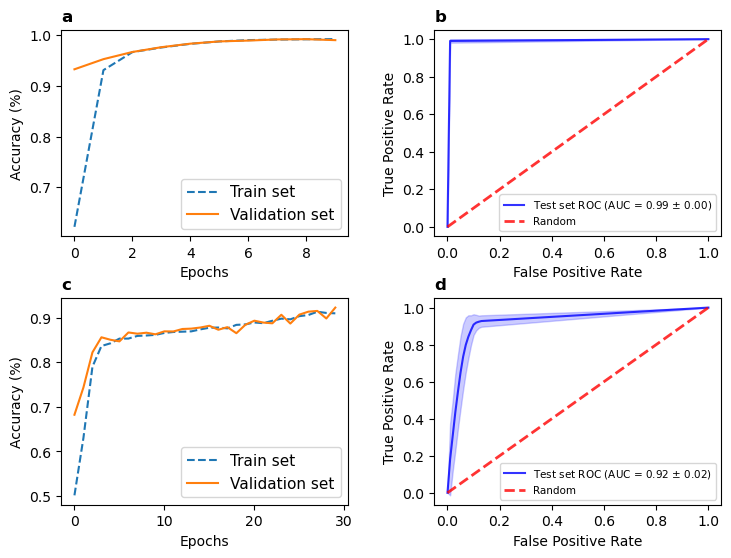

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(11,5))
ax0 = plt.subplot2grid((2, 2), (0, 0), colspan=1)
ax1 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=1)

plt.subplots_adjust(left=0.1, bottom=0.1, right=.7, top=1.05, wspace=0.3, hspace=0.3)    


put_Learning_curve(all_train_accuracy_Unmasked, all_validation_accuracy_Unmasked, ax0, 'a')
put_ROC_in_subplot(base_fpr_Unmasked, mean_tprs_Unmasked, tprs_lower_Unmasked, tprs_upper_Unmasked, mean_auc_Unmasked, std_auc_Unmasked,
                   ax2, xlabel = 'False Positive Rate', letter = 'b')



put_Learning_curve(all_train_accuracy_MASKED, all_validation_accuracy_MASKED, ax1, 'c')
put_ROC_in_subplot(base_fpr_MASKED, mean_tprs_MASKED, tprs_lower_MASKED, tprs_upper_MASKED, mean_auc_MASKED, std_auc_MASKED,
                   ax3, xlabel = 'False Positive Rate', letter = 'd')

In [14]:
learning_curves_MASKED =  pd.DataFrame({"train_accuracy": all_train_accuracy_MASKED, "validation_accuracy": all_validation_accuracy_MASKED})
learning_curves_NON_masked = pd.DataFrame({"train_accuracy": all_train_accuracy_Unmasked, "validation_accuracy": all_validation_accuracy_Unmasked})

learning_curves_MASKED.to_csv("./results/dataframes/learning_curves_MASKED.csv")

learning_curves_NON_masked.to_csv("./results/dataframes/learning_curves_NON_masked.csv")
